#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 10**
###**Reducción de Dimensionalidad - Descomposición en Valores Singulares (SVD) y Sistemas de Recomendación**


**Nombres y matrículas de los integrantes del equipo:**

- Alexis Hernández Martínez. Matrícula # A01016308
- José Fabricio Barahona Amaya. Matrícula # A01792950
- Giovanni Andrés Acuña Morales. Matrícula #A01794007
- Fernando Acevedo Ortegate. Matrícula # A01794022
- Fausto Velasco Atilano. Matricula #A01794392


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import TruncatedSVD


#**Ejercicio-1.** 

1. Descarga los archivos y genera la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluaciones generales dadas por los usuarios (rating). En particular indica el tamaño de dicha matriz y despliega sus primeros 10 renglones.

In [2]:
url1='/Users/alexishema/Downloads/RCdata/geoplaces2.csv'
url2='/Users/alexishema/Downloads/RCdata/rating_final.csv'

In [3]:
geo = pd.read_csv(url1,  sep=",",encoding='latin-1')  
ratings = pd.read_csv(url2,  sep=",",encoding='latin-1') 


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1161 non-null   object
 1   placeID         1161 non-null   int64 
 2   rating          1161 non-null   int64 
 3   food_rating     1161 non-null   int64 
 4   service_rating  1161 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 45.5+ KB


In [5]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   placeID         130 non-null    int64  
 1   latitude        130 non-null    float64
 2   longitude       130 non-null    float64
 3   the_geom_meter  130 non-null    object 
 4   name            130 non-null    object 
 5   address         130 non-null    object 
 6   city            130 non-null    object 
 7   state           130 non-null    object 
 8   country         130 non-null    object 
 9   fax             130 non-null    object 
 10  zip             130 non-null    object 
 11  alcohol         130 non-null    object 
 12  smoking_area    130 non-null    object 
 13  dress_code      130 non-null    object 
 14  accessibility   130 non-null    object 
 15  price           130 non-null    object 
 16  url             130 non-null    object 
 17  Rambience       130 non-null    obj

In [6]:
matriz_ratings_analisis = ratings[[ 'userID','placeID','rating','food_rating','service_rating']] 
matriz_ratings_analisis.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


In [7]:
matriz_ratings_grl = ratings[[ 'userID','rating','placeID']] 
matriz_geo_grl = geo[['name', 'placeID']] 



In [8]:
matriz_ratings_grl

,userID,rating,placeID
0,U1077,2,135085
1,U1077,2,135038
2,U1077,2,132825
3,U1077,1,135060
4,U1068,1,135104
...,...,...,...
1156,U1043,1,132630
1157,U1011,1,132715
1158,U1068,1,132733
1159,U1068,1,132594


In [9]:
matriz_geo_grl

,name,placeID
0,Kiku Cuernavaca,134999
1,puesto de tacos,132825
2,El Rincón de San Francisco,135106
3,little pizza Emilio Portes Gil,132667
4,carnitas_mata,132613
...,...,...
125,Chaires,132866
126,Sushi Itto,135072
127,Paniroles,135109
128,Restaurant Bar Coty y Pablo,135019


In [10]:
tabla_relacional = pd.merge(matriz_geo_grl,matriz_ratings_grl, on='placeID')   # dataFrame
tabla_relacional 

,name,placeID,userID,rating
0,Kiku Cuernavaca,134999,U1093,2
1,Kiku Cuernavaca,134999,U1066,1
2,Kiku Cuernavaca,134999,U1040,1
3,Kiku Cuernavaca,134999,U1110,2
4,Kiku Cuernavaca,134999,U1121,2
...,...,...,...,...
1156,Restaurant Bar Coty y Pablo,135019,U1121,2
1157,sirloin stockade,132877,U1047,0
1158,sirloin stockade,132877,U1111,1
1159,sirloin stockade,132877,U1015,1


In [11]:
UtMx = tabla_relacional.pivot_table(values='rating', index='userID', columns='name', fill_value=0)

UtMx.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
UtMx.shape 

(138, 129)

In [13]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx) / UtMx.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 907
Porcentaje de elementos diferentes de cero: 5.1%


#**Ejercicio-2.**

2. Con el objetivo de obtener la información con respecto a los vectores latentes de los restaurantes, obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos sus valores singulares. En particular indica la cantidad de valores singulares obtenidos.

In [14]:
X = UtMx.T     # Tomamos la traspuesta para que los renglones sean las películas y las columnas los usuarios.
X.shape

(129, 138)

In [15]:
SVD = TruncatedSVD(n_components=137, random_state=42)  
SVD.fit(X)


TruncatedSVD(n_components=137, random_state=42)

In [16]:
b=0
for a in SVD.singular_values_:
    b=b+1
print("La cantidad de valores singulares obtenidos es de:",b)

La cantidad de valores singulares obtenidos es de: 129


In [17]:
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(129, 129)

#**Ejercicio-3.**

3. Usando la métrica de correlación de Pearon, obtener las 10 mejores recomendaciones de este modelo no supervisado con base a la información de alguien que evaluó bien de manera general al “Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones.

In [18]:
corrMx = np.corrcoef(resultant_matrix, )
corrMx.shape

(129, 129)

In [19]:
me_gusta = "Subway"

names = UtMx.columns
names_list = list(names)
id_megusta = names_list.index(me_gusta)

id_megusta


88

In [20]:
corr_recomienda = corrMx[id_megusta]
print(corr_recomienda.shape)
print(corr_recomienda)

(129,)
[-7.69028369e-04 -7.87822168e-05 -5.27330975e-03  8.58511349e-04
 -3.03891148e-03  3.97495832e-05 -1.54820208e-03 -5.29347145e-03
  7.27520383e-04 -1.55098452e-03 -1.84483094e-03  3.01090491e-01
 -3.06938616e-05 -3.66639157e-03 -2.28024815e-03 -1.70971180e-03
  2.66961340e-03  4.58467365e-04 -2.11449533e-03 -6.20445134e-03
  3.34268563e-03  1.16598607e-01  1.87080102e-03  2.53682556e-03
 -5.48801141e-03 -2.91288266e-03  2.02825342e-03 -1.36607265e-03
 -2.01695899e-03  1.12058244e-01 -2.36235727e-03  6.52159239e-04
  3.53495770e-03 -3.62793330e-03  1.69065407e-03 -4.51837401e-03
 -2.09301342e-03  2.34634298e-01 -3.80413494e-03 -5.11845710e-04
 -2.27148704e-03  3.88178002e-01 -2.07427108e-03 -2.29428835e-03
  1.32565455e-03  3.01002479e-01  1.71433518e-01 -3.29715354e-03
 -4.74480596e-03 -8.02527884e-04 -2.65071452e-03  1.12018889e-01
 -3.91080724e-03 -2.06369812e-03  1.16008629e-01  2.27855804e-01
  4.28342495e-04 -8.69739761e-04  6.09520875e-01 -6.43364064e-03
  4.25467169e-01 -

In [21]:
corr_recomienda[id_megusta]

1.0

In [22]:
mejores10 = list(names[(corr_recomienda > 0.23)& (corr_recomienda < 1)])
mejores10

['Chilis Cuernavaca',
 'Log Yin',
 'Mariscos Tia Licha',
 'Mikasa',
 'Restaurant Teely',
 'Restaurant and Bar and Clothesline Carlos N Charlies',
 'Restaurant los Pinos',
 'Rincon del Bife',
 'Sanborns Casa Piedra',
 'Vips']

In [23]:
list(corr_recomienda[(corr_recomienda > 0.23)& (corr_recomienda < 1)])

[0.301090491044961,
 0.23463429773399852,
 0.3881780018525816,
 0.3010024785497628,
 0.6095208746935301,
 0.4254671689089249,
 0.28514921973296703,
 0.4298238308559109,
 0.41721850134793703,
 0.5062776799761117]

#**Ejercicio-4.**

4. Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares encontrado y la cantidad de información que contienen.

In [24]:
def busqueda_SVD(n,X,id_megusta,mejores10): 
    
    SVD = TruncatedSVD(n_components=137, random_state=1)  
    SVD.fit(X)
    
    
    SVD_busqueda = TruncatedSVD(n_components=n, random_state=42) 
    SVD_busqueda.fit(X)
    resultant_matrix_busqueda= SVD_busqueda.fit_transform(X)
    corrMx_busqueda = np.corrcoef(resultant_matrix_busqueda, )
    corr_recomienda_busqueda = corrMx_busqueda[id_megusta]
    comparacion_mejores = list(names[(corr_recomienda_busqueda > 0.999955)& (corr_recomienda_busqueda < 1)])
    print("Longitud de la segunda lista de recomendaciones:",len(comparacion_mejores),"\n")
    print("Número de recomendaciones que son iguales entre la lista con valores singulares full y la segunda lista:",len(set(mejores10).intersection(comparacion_mejores)))
    print('\nCantidad de información simplificada con los primeros %d vectores singulares:' % n)
    print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:n]).sum() / (SVD.singular_values_).sum())))
    return 

busqueda_SVD(8,X,id_megusta,mejores10)

Longitud de la segunda lista de recomendaciones: 10 

Número de recomendaciones que son iguales entre la lista con valores singulares full y la segunda lista: 9

Cantidad de información simplificada con los primeros 8 vectores singulares:
79.3%


#**Ejercicio-5.**

5. Repite el ejercicio con el restaurante “"tacos de barbacoa enfrente del Tec". Incluye tus conclusiones.

In [25]:
me_gusta2 = "tacos de barbacoa enfrente del Tec"


id_megusta2 = names_list.index(me_gusta2)

id_megusta2

124

In [26]:
corr_recomienda2 = corrMx[id_megusta2]
print(corr_recomienda2.shape)
print(corr_recomienda2)

(129,)
[ 1.90365985e-03  1.95018219e-04  1.30535991e-02 -2.12516683e-03
  7.52254923e-03 -9.83964813e-05  3.83243356e-03  1.31035076e-02
  4.07794920e-01  3.83932123e-03  4.56671136e-03  1.56152873e-03
  7.59798653e-05  9.07581917e-03  5.64454708e-03  4.23223620e-03
 -6.60838540e-03 -1.13489430e-03  5.23424104e-03  1.53585555e-02
 -8.27451453e-03  4.82434184e-03 -4.63099792e-03 -6.27968115e-03
  1.48442849e-01  1.91120451e-01 -5.02075704e-03  3.38158871e-03
  4.99279870e-03  5.56810594e-03  5.84780076e-03 -1.61436094e-03
 -8.75046657e-03  8.98061922e-03 -4.18506052e-03  1.11848243e-02
  2.58479385e-01  1.27230718e-02  9.41679037e-03  1.26702755e-03
  5.62285977e-03  5.74403685e-03  5.13466958e-03  5.67930233e-03
 -3.28153738e-03  1.83689220e-03  1.11393805e-02  8.16180397e-03
  1.17453360e-02  1.98658485e-03  6.56160293e-03  5.69993965e-03
  9.68084797e-03  5.10849717e-03  6.85473722e-03 -3.44059875e-03
 -1.06032292e-03  2.15296175e-03  1.33109496e-04  1.59258928e-02
  6.48831289e-03  

In [27]:
mejores10_2 = list(names[(corr_recomienda2 > 0.1709)& (corr_recomienda2 < 1)])
mejores10_2

['Carreton de Flautas y Migadas',
 'Hamburguesas La perica',
 'Little Cesarz',
 'Taqueria EL amigo ',
 'carnitas mata calle Emilio Portes Gil',
 'little pizza Emilio Portes Gil',
 'palomo tec',
 'puesto de gorditas',
 'tacos abi',
 'vips']

In [28]:
list(corr_recomienda2[(corr_recomienda2 > 0.1709)& (corr_recomienda2 < 1)])

[0.40779492018129593,
 0.19112045068235076,
 0.258479385426264,
 0.4371842084263567,
 0.17093947240845903,
 0.6538492684416535,
 0.19517408801078595,
 0.41276452318483897,
 0.6653053654632715,
 0.8171889849105266]

In [29]:
def busqueda_SVD_2(n,X,id_megusta,mejores10): 
    
    SVD = TruncatedSVD(n_components=137, random_state=1)  
    SVD.fit(X)
    
    
    SVD_busqueda = TruncatedSVD(n_components=n, random_state=42) 
    SVD_busqueda.fit(X)
    resultant_matrix_busqueda= SVD_busqueda.fit_transform(X)
    corrMx_busqueda = np.corrcoef(resultant_matrix_busqueda, )
    corr_recomienda_busqueda = corrMx_busqueda[id_megusta]
    comparacion_mejores = list(names[(corr_recomienda_busqueda > 0.175)& (corr_recomienda_busqueda < 1)])
    print("Longitud de la segunda lista de recomendaciones:",len(comparacion_mejores),"\n")
    print("Número de recomendaciones que son iguales entre la lista con valores singulares full y la segunda lista:",len(set(mejores10).intersection(comparacion_mejores)))
    print('\nCantidad de información simplificada con los primeros %d vectores singulares:' % n)
    print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:n]).sum() / (SVD.singular_values_).sum())))
    return 

busqueda_SVD_2(79,X,id_megusta2,mejores10_2)

Longitud de la segunda lista de recomendaciones: 10 

Número de recomendaciones que son iguales entre la lista con valores singulares full y la segunda lista: 9

Cantidad de información simplificada con los primeros 79 vectores singulares:
9.9%


**Conclusiones del Ejercicio 5** - La búsqueda para encontrar valores singulares reducidos vs el ejercicio 4 fue muy diferente. Se hicieron ejercicios manuales y para los componentes 8, prácticamente ya habíamos conseguido el 90% de similitud. Intentamos aplicar la misma metodología para el ejercicio 5 y apenas para los componentes 79 es que pudimos igualar la misma eficiencia. En este caso la información simplificada fue muy poca (9.9% comparado con 79.3% del otro ejercicio) lo cual prácticamente nos dice que necesitamos casi la misma información para poder tener ese grado de precisión.  

#**Ejercicio-6.**

6. Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluación dada a la comida (food_rating). Incluye tus conclusiones.

In [30]:
matriz_ratings_food = ratings[[ 'userID','food_rating','placeID']] 
matriz_geo_food = geo[['name', 'placeID']] 

In [31]:
matriz_ratings_food

,userID,food_rating,placeID
0,U1077,2,135085
1,U1077,2,135038
2,U1077,2,132825
3,U1077,2,135060
4,U1068,1,135104
...,...,...,...
1156,U1043,1,132630
1157,U1011,1,132715
1158,U1068,1,132733
1159,U1068,1,132594


In [32]:
matriz_geo_food

,name,placeID
0,Kiku Cuernavaca,134999
1,puesto de tacos,132825
2,El Rincón de San Francisco,135106
3,little pizza Emilio Portes Gil,132667
4,carnitas_mata,132613
...,...,...
125,Chaires,132866
126,Sushi Itto,135072
127,Paniroles,135109
128,Restaurant Bar Coty y Pablo,135019


In [33]:
tabla_relacional_food = pd.merge(matriz_geo_food,matriz_ratings_food, on='placeID')   # dataFrame
tabla_relacional_food

,name,placeID,userID,food_rating
0,Kiku Cuernavaca,134999,U1093,2
1,Kiku Cuernavaca,134999,U1066,1
2,Kiku Cuernavaca,134999,U1040,1
3,Kiku Cuernavaca,134999,U1110,2
4,Kiku Cuernavaca,134999,U1121,2
...,...,...,...,...
1156,Restaurant Bar Coty y Pablo,135019,U1121,2
1157,sirloin stockade,132877,U1047,0
1158,sirloin stockade,132877,U1111,1
1159,sirloin stockade,132877,U1015,1


In [34]:
UtMx_food = tabla_relacional_food.pivot_table(values='food_rating', index='userID', columns='name', fill_value=0)

UtMx_food.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
UtMx_food.shape 

(138, 129)

In [36]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx_food.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx_food)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx_food) / UtMx_food.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 895
Porcentaje de elementos diferentes de cero: 5.0%


In [37]:
X_food = UtMx_food.T     # Tomamos la traspuesta para que los renglones sean las películas y las columnas los usuarios.
X_food.shape

(129, 138)

In [38]:
SVD_food = TruncatedSVD(n_components=137, random_state=42)  
SVD_food.fit(X_food)

TruncatedSVD(n_components=137, random_state=42)

In [39]:
b=0
for a in SVD_food.singular_values_:
    b=b+1
print("La cantidad de valores singulares obtenidos es de:",b)

La cantidad de valores singulares obtenidos es de: 129


In [40]:
resultant_matrix_food = SVD_food.fit_transform(X_food)
resultant_matrix_food.shape

(129, 129)

In [41]:
corrMx_food = np.corrcoef(resultant_matrix_food, )
corrMx_food.shape

(129, 129)

In [42]:
me_gusta_food = "Subway"

names_food = UtMx_food.columns
names_list_food = list(names_food)
id_megusta_food = names_list_food.index(me_gusta_food)

id_megusta_food

88

In [43]:
corr_recomienda_food = corrMx_food[id_megusta_food]
print(corr_recomienda_food.shape)
print(corr_recomienda_food)

(129,)
[-5.06418108e-03  1.53891772e-03 -7.15705294e-03 -7.51437349e-04
  3.57844065e-04 -4.27908953e-03 -4.10491062e-03 -8.72391553e-03
 -5.80659154e-03 -7.37551348e-03 -6.29677017e-03  1.19529006e-03
 -5.49056441e-03 -6.25106315e-03 -2.26808294e-04  2.26784575e-03
 -4.97923491e-03 -7.33491870e-03 -5.49091909e-05 -6.54487708e-03
 -7.17291384e-04  2.31333734e-01 -9.42653806e-04  1.15809414e-03
 -2.44343966e-03 -2.46720616e-03 -8.43368969e-04 -2.05629573e-03
 -3.70288596e-03  2.50357400e-01 -5.28927854e-03  2.72981977e-03
  4.14365709e-04 -9.51153872e-03  2.32009229e-03 -9.29532082e-03
 -4.03970901e-03  1.31858098e-01 -8.36645261e-03 -2.30125601e-03
 -2.61409620e-03  4.15222053e-01  4.25538306e-03  3.02880631e-03
 -2.46282020e-03  2.09493113e-01  3.12082362e-01 -3.01154158e-03
 -3.10972278e-04 -1.11824996e-03  8.07121501e-04  2.24213782e-01
  2.65096107e-04  6.44807197e-04  2.32708368e-01  3.31706780e-01
  6.95063851e-04  3.47994174e-04  8.16413374e-01  1.04699730e-04
  4.68949686e-01  

In [44]:
corr_recomienda_food[id_megusta_food]

1.0

In [45]:
mejores10_food = list(names_food[(corr_recomienda_food > 0.232)& (corr_recomienda_food < 1)])
mejores10_food

['Kiku Cuernavaca',
 'Mariscos Tia Licha',
 'Paniroles',
 'Restaurant Familiar El Chino',
 'Restaurant Las Mananitas',
 'Restaurant Teely',
 'Restaurant and Bar and Clothesline Carlos N Charlies',
 'Rincon del Bife',
 'Sanborns Casa Piedra',
 'Vips']

In [46]:
list(corr_recomienda_food[(corr_recomienda_food > 0.232)& (corr_recomienda_food < 1)])


[0.2503574000343761,
 0.4152220526777525,
 0.3120823620746023,
 0.2327083683490987,
 0.33170678033949996,
 0.8164133737408052,
 0.4689496858109286,
 0.38181946304071174,
 0.3656566879992947,
 0.4421477019057163]

In [47]:
def busqueda_SVD(n,X,id_megusta,mejores10): 
    
    SVD = TruncatedSVD(n_components=137, random_state=1)  
    SVD.fit(X)
    
    
    SVD_busqueda = TruncatedSVD(n_components=n, random_state=42) 
    SVD_busqueda.fit(X)
    resultant_matrix_busqueda= SVD_busqueda.fit_transform(X)
    corrMx_busqueda = np.corrcoef(resultant_matrix_busqueda, )
    corr_recomienda_busqueda = corrMx_busqueda[id_megusta]
    comparacion_mejores = list(names[(corr_recomienda_busqueda > 0.2515)& (corr_recomienda_busqueda < 1)])
    print("Longitud de la segunda lista de recomendaciones:",len(comparacion_mejores),"\n")
    print("Número de recomendaciones que son iguales entre la lista con valores singulares full y la segunda lista:",len(set(mejores10).intersection(comparacion_mejores)))
    print('\nCantidad de información simplificada con los primeros %d vectores singulares:' % n)
    print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:n]).sum() / (SVD.singular_values_).sum())))
    return 

busqueda_SVD(72,X_food,id_megusta_food,mejores10_food)

Longitud de la segunda lista de recomendaciones: 10 

Número de recomendaciones que son iguales entre la lista con valores singulares full y la segunda lista: 9

Cantidad de información simplificada con los primeros 72 vectores singulares:
13.5%


**Conclusiones del ejercicio 6**- En este caso, hubo una variación grande si comparamos Subway General vs Subway Ratings Comida, en el primer caso, necesitamos 8 valores singulares y en este caso estamos necesitando 72. Esto significa que la cantidad de información que podemos reducir, para ratings_food, es mucho menor que comparada para los ratings_general, pues solamente pudimos reducir el 13.5%. También los porcentajes de correlación tuvimos que bajarlos mucho para poder tener una eficacia del 90%.

#**Ejercicio-7.**

7. Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluación dada al servicio (service_rating). Incluye tus conclusiones.

In [48]:
matriz_ratings_service = ratings[[ 'userID','service_rating','placeID']] 
matriz_geo_service = geo[['name', 'placeID']] 

In [49]:
matriz_ratings_service

,userID,service_rating,placeID
0,U1077,2,135085
1,U1077,1,135038
2,U1077,2,132825
3,U1077,2,135060
4,U1068,2,135104
...,...,...,...
1156,U1043,1,132630
1157,U1011,0,132715
1158,U1068,0,132733
1159,U1068,1,132594


In [50]:
matriz_geo_service

,name,placeID
0,Kiku Cuernavaca,134999
1,puesto de tacos,132825
2,El Rincón de San Francisco,135106
3,little pizza Emilio Portes Gil,132667
4,carnitas_mata,132613
...,...,...
125,Chaires,132866
126,Sushi Itto,135072
127,Paniroles,135109
128,Restaurant Bar Coty y Pablo,135019


In [51]:
tabla_relacional_service = pd.merge(matriz_geo_service,matriz_ratings_service, on='placeID')   # dataFrame
tabla_relacional_service

,name,placeID,userID,service_rating
0,Kiku Cuernavaca,134999,U1093,2
1,Kiku Cuernavaca,134999,U1066,1
2,Kiku Cuernavaca,134999,U1040,1
3,Kiku Cuernavaca,134999,U1110,2
4,Kiku Cuernavaca,134999,U1121,2
...,...,...,...,...
1156,Restaurant Bar Coty y Pablo,135019,U1121,2
1157,sirloin stockade,132877,U1047,0
1158,sirloin stockade,132877,U1111,1
1159,sirloin stockade,132877,U1015,2


In [52]:
UtMx_service = tabla_relacional_service.pivot_table(values='service_rating', index='userID', columns='name', fill_value=0)

UtMx_service.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
UtMx_service.shape 

(138, 129)

In [54]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx_service.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx_service)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx_service) / UtMx_service.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 846
Porcentaje de elementos diferentes de cero: 4.8%


In [55]:
X_service = UtMx_service.T     # Tomamos la traspuesta para que los renglones sean las películas y las columnas los usuarios.
X_service.shape

(129, 138)

In [56]:
SVD_service = TruncatedSVD(n_components=137, random_state=42)  
SVD_service.fit(X_service)

TruncatedSVD(n_components=137, random_state=42)

In [57]:
b=0
for a in SVD_service.singular_values_:
    b=b+1
print("La cantidad de valores singulares obtenidos es de:",b)

La cantidad de valores singulares obtenidos es de: 129


In [58]:
resultant_matrix_service = SVD_service.fit_transform(X_service)
resultant_matrix_service.shape

(129, 129)

In [59]:
corrMx_service = np.corrcoef(resultant_matrix_service, )
corrMx_service.shape

(129, 129)

In [60]:
me_gusta_service = "Subway"

names_service = UtMx_service.columns
names_list_service = list(names_service)
id_megusta_service = names_list_service.index(me_gusta_service)

id_megusta_service

88

In [61]:
corr_recomienda_service = corrMx_service[id_megusta_service]
print(corr_recomienda_service.shape)
print(corr_recomienda_service)

(129,)
[-2.91095724e-04 -3.60361693e-03  4.17542463e-03  5.49600644e-03
  8.22025821e-03  9.26584331e-04 -1.84324856e-04  2.08477911e-02
  4.16661248e-04  5.49213204e-03 -9.83321202e-03  2.30697829e-01
 -7.71002964e-04 -7.78964069e-03  4.28478573e-03 -1.96660815e-03
  6.46627016e-03  1.22858323e-02  5.23591750e-03 -3.37285475e-03
  4.22033518e-03  1.92759594e-01  3.25932626e-03  1.31225788e-02
  1.02856131e-02  1.08386707e-02 -2.32136875e-03  9.93522146e-03
 -8.13035667e-03  1.78740094e-01  1.27492522e-03  4.01749269e-03
  9.93395882e-03  1.06861306e-02  1.08193009e-02  6.49374214e-03
  2.57816306e-03  1.10159929e-02  1.62133585e-02  9.40455020e-03
  1.04115070e-02  1.39761855e-01  4.95429442e-03  1.01065382e-02
  7.45513647e-03  1.62758051e-02  3.65933684e-01 -4.53806898e-03
  1.94095851e-03  6.28735982e-03  7.08759527e-03  4.35778543e-03
  7.61149284e-03  6.86889327e-03  1.82869479e-01  2.26266242e-01
  8.41417946e-03 -1.38744406e-02  7.72973139e-01  2.58304203e-04
  6.00160625e-01  

In [62]:
corr_recomienda_service[id_megusta_service]


1.0

In [63]:
mejores10_service = list(names_service[(corr_recomienda_service > 0.15)& (corr_recomienda_service < 1)])
mejores10_service

['Chilis Cuernavaca',
 'Giovannis',
 'Kiku Cuernavaca',
 'Paniroles',
 'Restaurant Familiar El Chino',
 'Restaurant Las Mananitas',
 'Restaurant Teely',
 'Restaurant and Bar and Clothesline Carlos N Charlies',
 'Rincon del Bife',
 'Vips']

In [64]:
list(corr_recomienda_service[(corr_recomienda_service > 0.15)& (corr_recomienda_service < 1)])


[0.23069782868565766,
 0.19275959390458483,
 0.17874009403033436,
 0.36593368424534367,
 0.18286947897963024,
 0.2262662422342514,
 0.772973138691839,
 0.6001606252966748,
 0.5187314706565791,
 0.4211998645650437]

In [65]:
def busqueda_SVD(n,X,id_megusta,mejores10): 
    
    SVD = TruncatedSVD(n_components=137, random_state=1)  
    SVD.fit(X)
    
    
    SVD_busqueda = TruncatedSVD(n_components=n, random_state=42) 
    SVD_busqueda.fit(X)
    resultant_matrix_busqueda= SVD_busqueda.fit_transform(X)
    corrMx_busqueda = np.corrcoef(resultant_matrix_busqueda, )
    corr_recomienda_busqueda = corrMx_busqueda[id_megusta]
    comparacion_mejores = list(names[(corr_recomienda_busqueda > 0.18)& (corr_recomienda_busqueda < 1)])
    print("Longitud de la segunda lista de recomendaciones:",len(comparacion_mejores),"\n")
    print("Número de recomendaciones que son iguales entre la lista con valores singulares full y la segunda lista:",len(set(mejores10).intersection(comparacion_mejores)))
    print('\nCantidad de información simplificada con los primeros %d vectores singulares:' % n)
    print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:n]).sum() / (SVD.singular_values_).sum())))
    return 

busqueda_SVD(47,X_service,id_megusta_service,mejores10_service)

Longitud de la segunda lista de recomendaciones: 10 

Número de recomendaciones que son iguales entre la lista con valores singulares full y la segunda lista: 9

Cantidad de información simplificada con los primeros 47 vectores singulares:
29.9%


**Conclusiones del ejercicio 7**- En este caso, hubo una variación mediana si comparamos Subway Ratings Comida vs Subway Ratings Servicio, en el primer caso, necesitamos 72 valores singulares y en este caso estamos necesitando 47. Esto significa que la cantidad de información que podemos reducir, para ratings_service, es mucho mayor que comparada para los ratings_food, pues  pudimos reducir hasta un 29.9%. Desafortunadamente los porcentajes de correlación tuvimos que bajarlos aún más para poder tener una eficacia del 90%, pues llegamos hasta el 18%.

#**Ejercicio-8.**

8. Incluye tus conclusiones finales. En particular indica la coincidencia o no de estos tres modelos.

**Conclusiones** - Inicialmente, hicimos un análisis rápido de los datos con el .describe(), sobre todo tratando de entender cómo se comportaban los ratings generales, de comida y de servicio. A continuación una imagen del análisis:

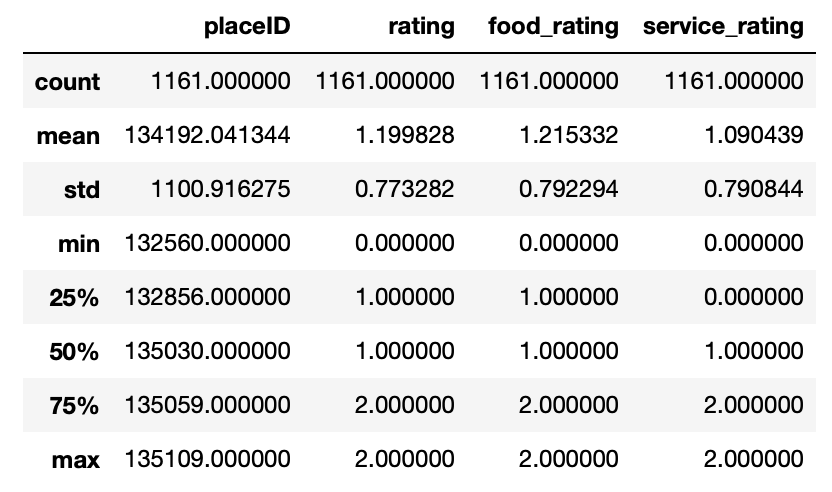

En este análisis, podemos ver que tanto la media como la desviación estándar de los 3 ratings tienen valores muy parecidos. De igual manera sus valores mínimos y máximos son similares. Esto inicialmente pudiera darnos la conclusión de que utilizar las 3 columnas en diferentes columnas de utilidad tendría la misma dificultad/facilidad.

Sin embargo, ahora sabemos que para interactuar con este tipo de métodos y de aprendizajes no supervisados, hay que evaluar la verdadera data relevante que tenemos en las matrices de utilidad. Los 3 ejercicios estuvieron en niveles relativamente bajos, entre 4.8 y 5.1%. Otra variable a tomar en cuenta, es que en este caso estuvimos trabajando con restaurantes específicos, como Subway y los famosos tacos enfrente del Tec. La participación de estos restaurantes dentro de los distintos usuarios fue muy variada, y es por eso que en todos los casos tuvimos que utilizar más o menos componentes para poder tener una predicción del 90%.

**En esta gráfica escribimos los resultados que obtuvimos en los últimos 4 ejercicios:**




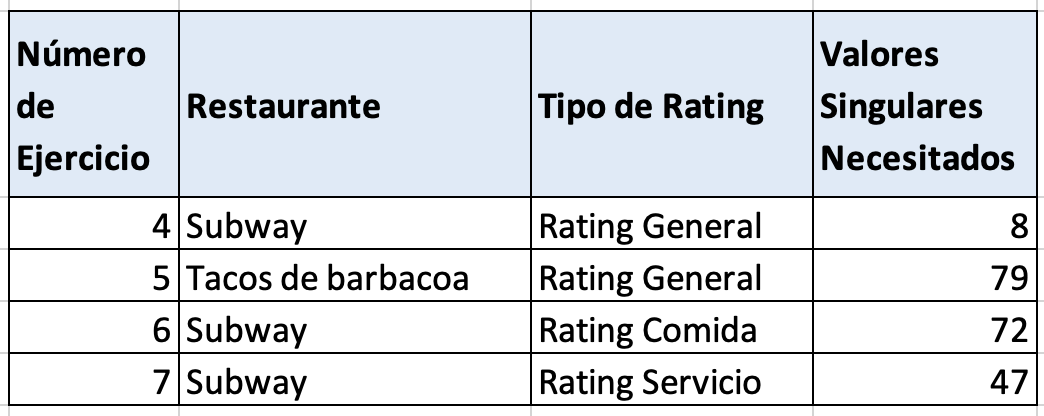

En la misma, podemos ver que tuvimos casos variados, en los cuales necesitamos pocos y muchos valores singulares para llegar al 90% de precisión, inclusive en el rating general pudimos ver que la variación es muy alta, comparado con el restaurante que estemos trabajando.

Otro aspecto a analizar es el porcentaje de correlación necesaria para alcanzar la precisión del 90%. En la mayoría de los casos, tuvimos que trabajar con porcentajes de correlación muy bajos -entre 17 y 25%-, lo cual indica que las predicciones que estamos obteniendo, ya sea con muchos o pocos valores singulares, en realidad no tienen tanta relación. Caso distinto cuando usamos todos los componentes (137), obtuvimos un valor de correlación de las 10 mejores recomendaciones con un valor mayor a 0.99

Por lo tanto podemos concluir que la coincidencia de todos los modelos no fue muy alta, pero eso es bueno porque al final de cuentas estamos trabajando con ratings muy diferentes, si indicaran lo mismo, entonces significaría que bastara una para poder hacer una clasificación general, y en este punto si implementamos el servicio, si le estaremos entregando diferentes recomendaciones a los clientes, dependiendo si ellos prefirieran priorizar el servicio o la comida. Técnicamente hablando, consideramos que deberíamos utilizar más de la mitad de los valores singulares originales si queremos obtener recomendaciones con valores de correlación altos.

###**Fin de la Actividad de la semana 10 - Sistemas de Recomendación y Reducción de Dimensionalidad con SVD.**